In [19]:
!pip install TextBlob

In [20]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
-import nltk


In [23]:
df = pd.read_csv('twitter_training.csv')

In [26]:
column_names=['id','product','sentiment','text']
df=pd.read_csv('twitter_training.csv', names=column_names, encoding = 'ISO-8859-1')


In [29]:
def preprocess_text(text):
    # Handle NaN values
    if pd.isna(text):
        return ""
    
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'\W', ' ', text) 
    text = text.lower()
    return text
df['cleaned_text'] = df['text'].apply(preprocess_text)

print(df[['text', 'cleaned_text']])

                                                    text  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
74678  Just realized that my Mac window partition is ...   
74679  Just realized the windows partition of my Mac ...   
74680  Just realized between the windows partition of...   
74681  Just like the windows partition of my Mac is l...   

                                            cleaned_text  
0      im getting on borderlands and i will murder yo...  
1      i am coming to the borders and i will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will 

In [30]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def remove_stopwords_and_stem(text):
    words = text.split()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['processed_text'] = df['cleaned_text'].apply(remove_stopwords_and_stem)
print(df[['text', 'cleaned_text', 'processed_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deept\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

               processed_text  
0    im get borderland murder  
1            come border kill  
2      im get borderland kill  
3   im come borderland murder  
4  im get borderland 2 murder  


In [31]:
df['target'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)


X = df['processed_text']
y = df['target']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [34]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


y_pred = model.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8240610564370355


C:\Users\deept\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')


df['date'] = pd.to_datetime(df['date'])


def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [36]:
df['sentiment_score'] = df['processed_text'].apply(get_sentiment)

In [37]:
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [38]:
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


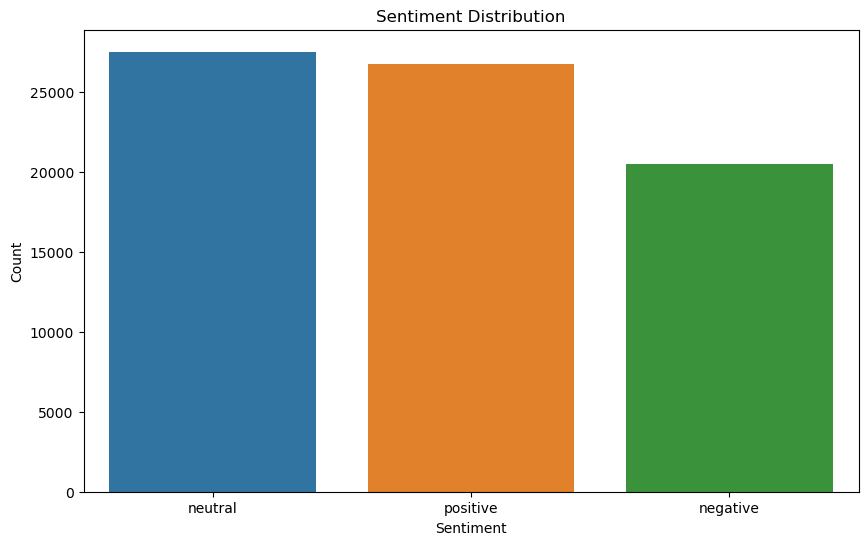

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [40]:
sentiment_trend = df.groupby(['date', 'sentiment_label']).size().unstack().fillna(0)

<Figure size 1200x600 with 0 Axes>

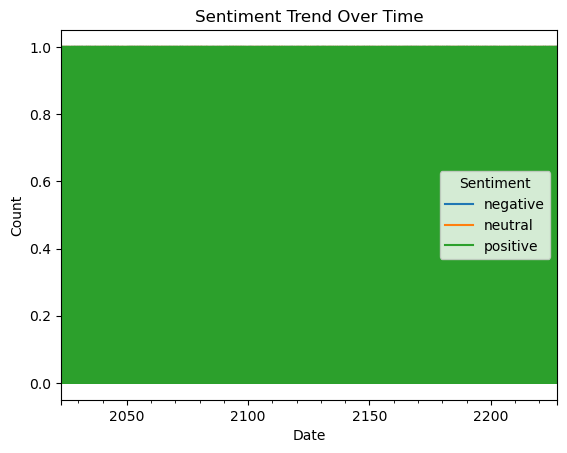

In [41]:
plt.figure(figsize=(12, 6))
sentiment_trend.plot()
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [42]:
X_new = X_test.iloc[4]
X_new_vec = vectorizer.transform([X_new])
y_test_sample = y_test.iloc[4]
prediction = model.predict(X_new_vec)

print(f"Actual Sentiment: {'negative' if y_test_sample == 0 else 'positive'}")
print(f"Predicted Sentiment: {'negative' if prediction[0] == 0 else 'positive'}")
if prediction[0] == 0:
    print('The review is negative')
else:
    print('The review is positive')

Actual Sentiment: positive
Predicted Sentiment: positive
The review is positive


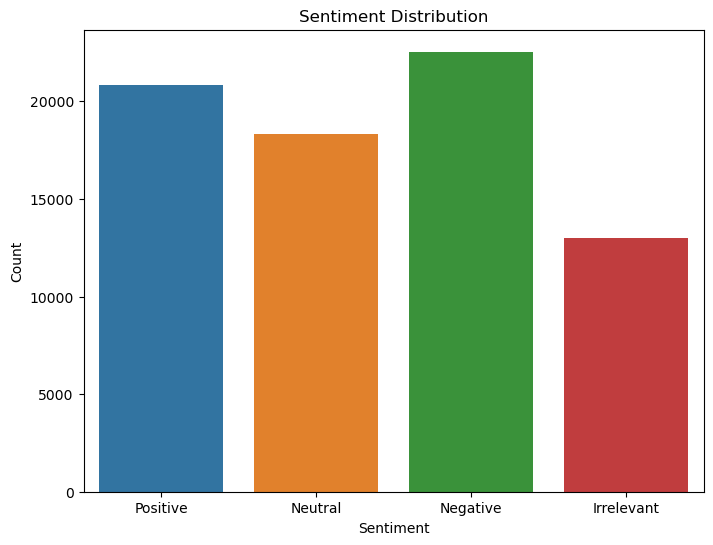

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\deept\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


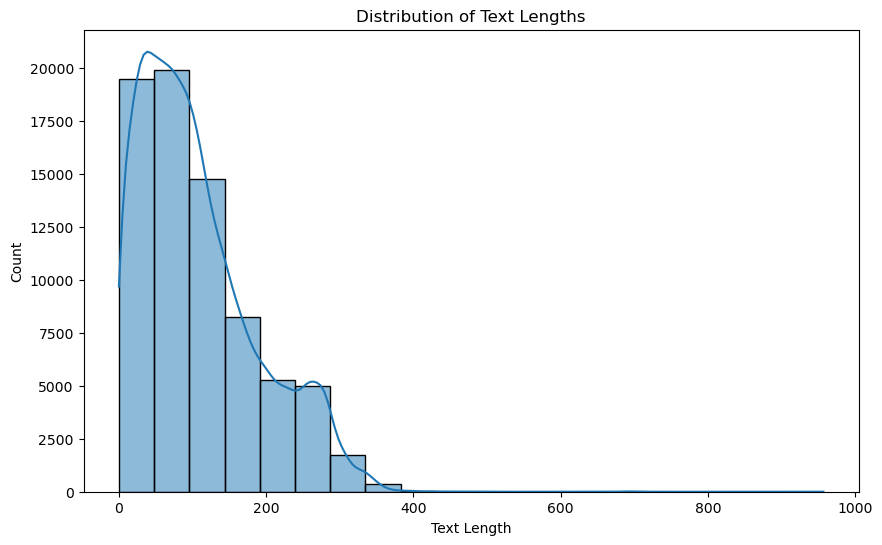

In [48]:
df.loc[2, 'text'] = float('nan')  # Set one value to NaN

def get_text_length(text):
    if pd.isna(text):
        return 0
    return len(text)

df['text_length'] = df['text'].apply(get_text_length)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [50]:
df.loc[2, 'text'] = float('nan')  # Set one value to NaN

def count_words(text):
    if pd.isna(text):
        return Counter()
    words = re.findall(r'\b\w+\b', str(text).lower())  # Convert to string and then process
    return Counter(words)

df['word_counts'] = df['text'].apply(count_words)

total_word_counts = Counter()
for word_count in df['word_counts']:
    total_word_counts += word_count

most_common_words = total_word_counts.most_common(20)
print(most_common_words)

[('the', 44600), ('i', 34467), ('to', 29035), ('and', 26702), ('a', 24288), ('of', 19522), ('is', 17880), ('it', 17027), ('in', 15784), ('for', 15658), ('this', 14750), ('you', 12868), ('on', 12148), ('my', 11910), ('t', 11635), ('s', 11187), ('that', 10925), ('com', 10072), ('with', 8897), ('game', 8247)]


C:\Users\deept\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deept\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


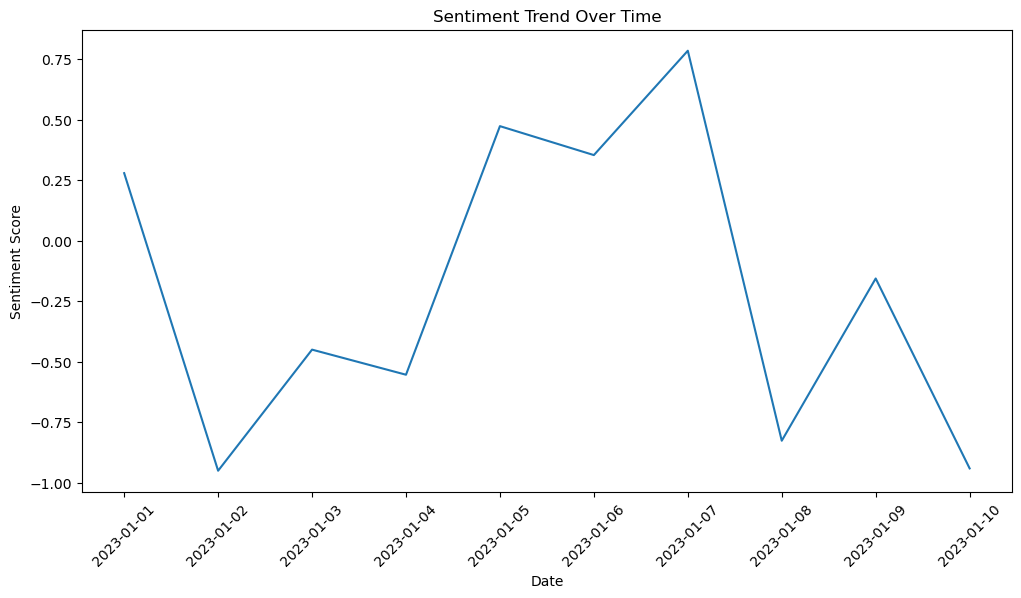

In [51]:
import random
from datetime import timedelta

start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-01-10')
dates = pd.date_range(start=start_date, end=end_date, freq='D')

random.seed(42)
sentiment_scores = [random.uniform(-1, 1) for _ in range(len(dates))]

time_series_df = pd.DataFrame({
    'date': dates,
    'sentiment_score': sentiment_scores
})

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment_score', data=time_series_df)
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

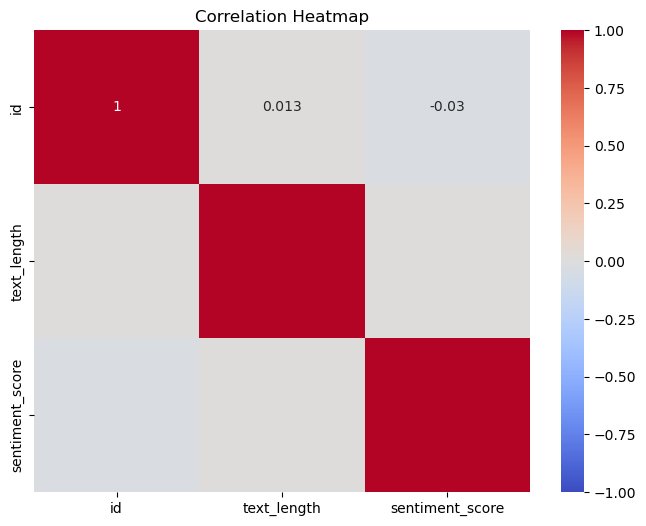

In [52]:
corr_matrix = df[['id', 'text_length', 'sentiment_score']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

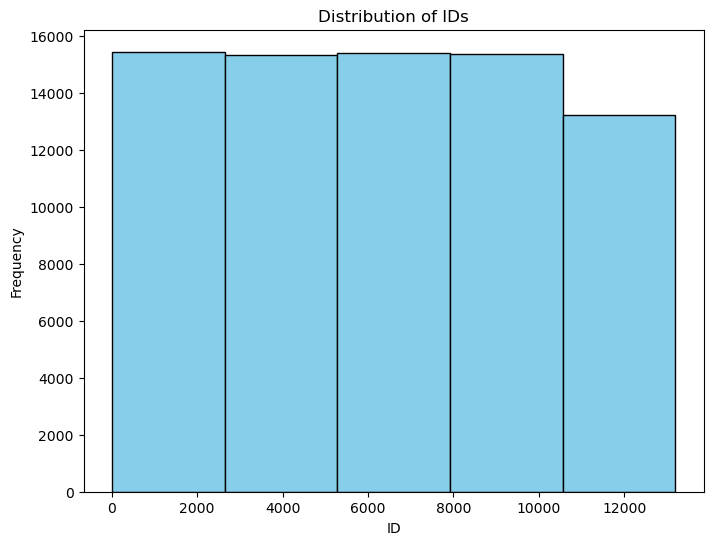

In [54]:
plt.figure(figsize=(8, 6))
plt.hist(df['id'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of IDs')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()